<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-08%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎄 EXPLORATION 08**

- **🌲 EXPLORATION 08-1 : 학습**  
- **🌲 EXPLORATION 08-2 : 고양이 수염 스티커 만들기**  
    - **🌿 01_데이터 준비**  
        - 01-1_라이브러리 import  
        - 01-2_데이터 import  
        - 01-3_이미지 import  
    - **🌿 02_얼굴 검출**  
        - 02-1_bounding box 추출  
        - 02-2_bounding box 시각화   
    - **🌿 03_얼굴 랜드마크**
        - 03-1_얼굴 랜드마크 이미지 확인  
        - 03-2_얼굴 랜드마크 검출  
        - 03-3_얼굴 랜드마크 시각화  
    - **🌿 04_스티커 적용**  
        - 04-1_스티커 좌표 확인  
        - 04-2_스티커 적용  
        - 04-3_스티커 적용 시각화  
        - 04-4_스티커 투명도 조절  
- **🌲 EXPLORATION 08-3 : 문제점 찾아보기**  
    - **🌿 01_함수 생성**  
    - **🌿 02_이미지 적용**  
        - 02-1_실제 사람이 아닌 경우  
        - 02-2_이미지 방향이 다를 경우  
        - 02-3_이미지 각도가 다를 경우  
        - 02-4_이미지 거리가 다를 경우  
        - 02-5_이미지 명암이 다를 경우  
        - 02-6_이미지에 포함된 사람 수가 다른 경우  
- **🌲 EXPLORATION 08-4 : 결론**  

<hr>

# **🌲 EXPLORATION 08-1 : 학습**

- **png(Portable Network Graphics)**  
배경이 투명한 무손실 압축을 사용한 이미지 파일(이미지 손실 없는 고품질 이미지)  

-  **랜드마크(landmark) / 조정(alignment)**  
얼굴의 각각 위치를 찾아내는 기술  

- **opencv**  
컴퓨터 비전 라이브러리  

- **face detector**  
HOG와 SVM를 활용해 얼굴 인식  
    - **HOG(Histogram of Oriented Gradients)**  
    이미지 색상의 변화량  
    이미지를 벡터로 만들어 SVM에 활용  
    - **SVM(Support Vector Machine)**  
    선형 분류  
    - **sliding window**  
    작은 영역을 이동해가며 확인  
    이미지가 크면 클수록 오래걸림  

- **Object keypoint estimation**  
객체 내부의 점을 찾는 기술  
    - **top-down**  
    bounding box를 찾고 box 내부의 keypoint를 예측  
    - **bottom-up**  
    이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성  

<hr>

# **🌲 EXPLORATION 08-2 : 고양이 수염 스티커 만들기**

## **🌿 01_데이터 준비**

### **🍃 01-1_라이브러리 import**

- **os** (운영체제 기능 사용)  
- **cv2** (이미지 처리)  
- **dlib** (안면 인식 처리)  
- **numpy** (수치 계산)  
- **matplotlib** (시각화)  

In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

### **🍃 01-2_데이터 import**

- **이미지, 스티커, 모델, 랜드마크 이미지 import**  

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/exploration/E-08/data/images/img_01.png'
sticker_path= os.getenv('HOME')+'/aiffel/exploration/E-08/data/images/sticker_01.png'
model_path = os.getenv('HOME')+'/aiffel/exploration/E-08/data/models/shape_predictor_68_face_landmarks.dat' 
landmark_image_path = os.getenv('HOME')+'/aiffel/exploration/E-08/data/images/landmark_image.png' 

### **🍃 01-3_이미지 import**

- **OpenCV를 활용한 이미지 import**  
OpenCV는 BGR 이미지로 RGB로 색 보정이 필요  
    - **cv2.imread('파일명',읽기 flag)**  
    이미지 출력 (-1: alpha channel까지 포함 / 0: grayscale / 1: color)  
    - **.copy()**  
    복사 (얕은 복사)  

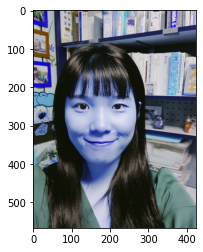

In [ ]:
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()  
plt.imshow(img_bgr)
plt.show()

- **matplotlib을 활용한 색 보정 시각화**
    - **cvtColor(객체, cv2.변환 채널)**  
    컬러 변환 (변환 채널 형태: 변환전채널2변환후채널)  
    채널의 종류에는 GRAY / RGB / HSV / YCrCb / Luv 등이 있음  
    - **plt.imshow()**    
    이미지 표시

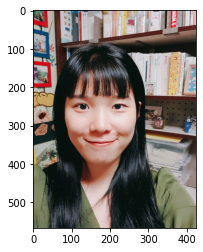

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## **🌿  02_얼굴 검출**

### **🍃 02-1_bounding box 추출**

- **dlib를 활용한 얼굴 검출**  
    - **face detector()**  
    HOG와 SVM을 사용한 얼굴 인식  

In [ ]:
detector_hog = dlib.get_frontal_face_detector()

- **bounding box 추출**    
이미지 피라미드: 이미지를 upsampling 방법으로 크기를 키우는 것

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # 뒤의 숫자는 이미지 피라미드 수 의미
print(dlib_rects)

rectangles[[(77, 201) (262, 387)]]


### **🍃 02-2_bounding box 시각화**

- **bounding box 시각화**  
선택 영역 범위를 bounding box로 추출  
    - **cv2.rectangle()**  
    사각형 그리기 (선 타입: cv2.LINE_4 / cv2.LINE_8 / cv2.LINE_AA - 부드러움)  
- **matplotlib을 활용한 이미지 시각화**  
     - **plt.imshow()**    
     이미지 표시

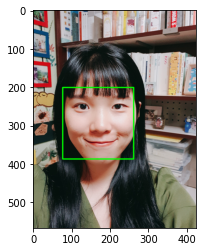

In [ ]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## **🌿  03_얼굴 랜드마크**

### **🍃 03-1_얼굴 랜드마크 이미지 확인**

- **검출될 얼굴 랜드마크 점 위치 표시**  
    - **cv2.imread('파일명',읽기 flag)**  
    이미지 출력 (-1: alpha channel까지 포함 / 0: grayscale / 1: color)  
- **matplotlib을 활용한 이미지 시각화**  
    - **plt.imshow()**    
    이미지 표시

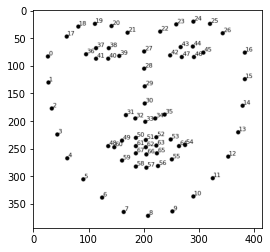

In [ ]:
landmark_img = cv2.imread(landmark_image_path)
plt.imshow(landmark_img)
plt.show()

### **🍃 03-2_얼굴 랜드마크 검출**

- **dlib를 이용한 얼굴 랜드마크 검출**  
    - **dlib.shape_predictor()**  
    얼굴 랜드마크 검출  

In [ ]:
landmark_predictor = dlib.shape_predictor(model_path)

- **얼굴 개수마다 68개의 랜드마크 저장**  

In [ ]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### **🍃 03-3_얼굴 랜드마크 시각화**

- **랜드마크 각 점 표시** 
    - **cv2.circle(이미지파일명, 중심점, 반지름, 색, 두께)**  
    원 그리기 (두께 -1의 경우 채운 원 표시)  

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

- **matplotlib을 활용한 이미지 시각화**  
    - **plt.imshow()**    
    이미지 표시

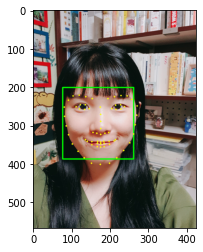

In [ ]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## **🌿  04_스티커 적용**

### **🍃 04-1_스티커 좌표 확인**

- **랜드마크 이미지를 활용한 코 위치 확인**  
랜드마크 이미지 내 코 위치: 30  

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(176, 308)
(x,y) : (176,215)
(w,h) : (186,186)


### **🍃 04-2_스티커 적용**

- **랜드마크 사이즈에 맞게 이미지 리사이즈**  
    - **cv2.resize()**  
    이미지 리사이즈

In [ ]:
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(186, 186, 3)


- **원본 이미지에 스티커 추가를 위한 좌표 조정**

In [ ]:
x = x - w // 2
print ('(x,y) : (%d,%d)'%(x, y))

(x,y) : (83,215)


- **원본 이미지에 스티커 적용**  
    - **np.where()**  
    조건에 맞는 값 찾기  
    - **.astype()**  
    데이터프레임 타입 변환  

In [ ]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

### **🍃 04-3_스티커 적용 시각화**

- **matplotlib을 활용한 이미지 시각화**  
    - **plt.imshow()**    
    이미지 표시

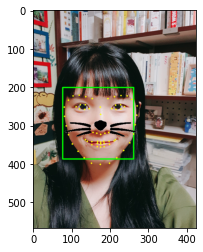

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### **🍃 04-4_스티커 투명도 조절**  

- **OpenCV를 활용한 스티커 투명도 조절**
    - **cv2.addWeighted()**  
    이미지 블랜딩  
    - **np.where()**  
    조건에 맞는 값 찾기
    - **.astype()**  
    데이터프레임 타입 변환  
- **matplotlib을 활용한 이미지 시각화**
    - **plt.imshow()**  
    이미지 표시

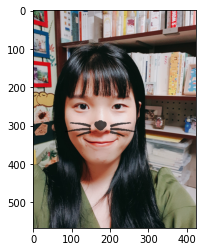

In [ ]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

add = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.6, 0)

img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, add, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

<hr>

# **🌲 EXPLORATION 08-3 : 문제점 찾아보기**

## **🌿 01_함수 생성**

- **위의 코드와 동일하게 함수 생성**  
original / bounding box / landmarks / sticker 순으로 출력 (검출이 안되는 경우, original만 출력)  

In [ ]:
def new_sticker_image(new_img_name):
    new_image_path = os.getenv('HOME')+'/aiffel/exploration/E-08/data/images/' + new_img_name
    img_bgr = cv2.imread(new_image_path)
    img_show = img_bgr.copy()

    plt.figure(figsize=(15, 8)) 
    plt.subplot(141)
    plt.title('original')
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

    detector_hog = dlib.get_frontal_face_detector()   
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
          
        plt.subplot(142)
        plt.title('bounding box')
        img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)

        model_path = os.getenv('HOME')+'/aiffel/exploration/E-08/data/models/shape_predictor_68_face_landmarks.dat' 
        landmark_predictor = dlib.shape_predictor(model_path)

        list_landmarks = []
        for dlib_rect in dlib_rects:
            points = landmark_predictor(img_rgb, dlib_rect)
            list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            list_landmarks.append(list_points)

        if len(list_landmarks) <1:
                break
        else:
            for landmark in list_landmarks:
                for point in landmark:
                    cv2.circle(img_show, point, 2, (0, 255, 255), -1)

            plt.subplot(143)
            plt.title('landmarks')
            plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

            for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
                x = landmark[30][0]
                y = landmark[30][1] - dlib_rect.height()//2
                w = h = dlib_rect.width()

                sticker_path= os.getenv('HOME')+'/aiffel/exploration/E-08/data/images/sticker_01.png'
                img_sticker = cv2.imread(sticker_path)
                img_sticker = cv2.resize(img_sticker, (w,h))

                x = x - w // 2

                sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
                img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
                np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

                refined_x = x - w // 2
                refined_y = y - h // 2

                sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
                add = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.6, 0)
                img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
                    np.where(img_sticker==0, add, sticker_area).astype(np.uint8)

            plt.subplot(144)
            plt.title('sticker')
            plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
            plt.show()

## **🌿 02_이미지 적용**

### **🍃 02-1_실제 사람이 아닌 경우** 

- **3D 캐릭터/2D 캐릭터/원숭이 상관 없이 랜드마크 검출이 가능하면 인식 가능**  
- **눈썹, 턱이 잘 표현된 이미지의 경우 대부분 인식 가능**  

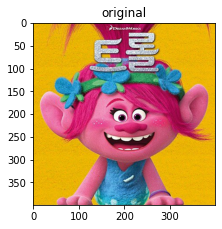

In [ ]:
new_sticker_image('img_ex_01.png')

**인식 불가**  
눈썹이 잘 보이지 않아서 인식이 안된다고 추측  

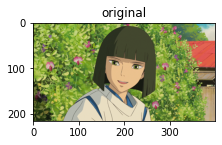

In [ ]:
new_sticker_image('img_ex_02.png')

**인식 불가**  
눈썹이 잘 보이지 않아서 인식이 안된다고 추측  

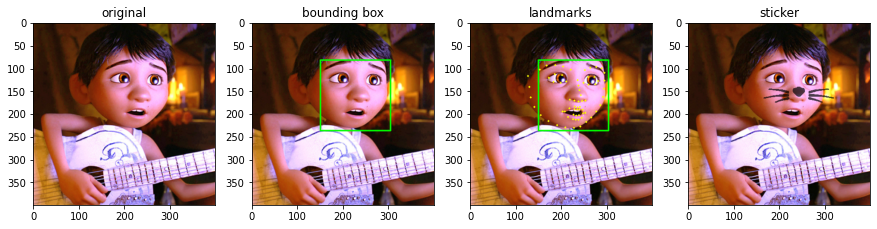

In [ ]:
new_sticker_image('img_ex_03.png')

**인식 가능**  
눈썹과 턱선이 잘 보이는 이미지여서 인식이 된다고 추측  

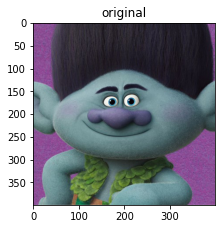

In [ ]:
new_sticker_image('img_ex_04.png')

**인식 불가**  
위의 추측을 기반으로 눈썹과 턱선이 잘 보이는 이미지를 선택  
턱선이 너무 넓은 관계로 인식이 안된다고 추측  

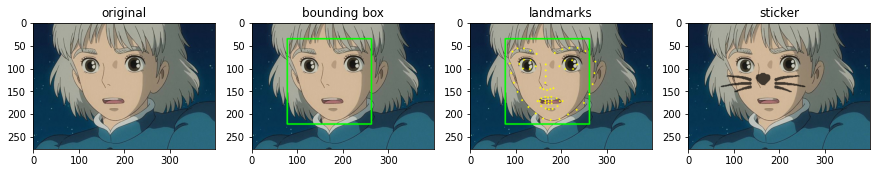

In [ ]:
new_sticker_image('img_ex_05.png')

**인식 가능**  
위의 추측을 기반으로 눈썹과 턱선이 잘 보이는 이미지를 선택  
랜드마크의 위치가 눈썹과 턱 이외에 잘 안맞지만 인식 가능  

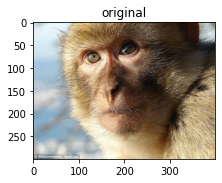

In [ ]:
new_sticker_image('img_ex_06.png')

**인식 불가**  
눈썹과 눈의 사이가 너무 가까워 얼굴이 제대로 인식이 안된다고 추측  

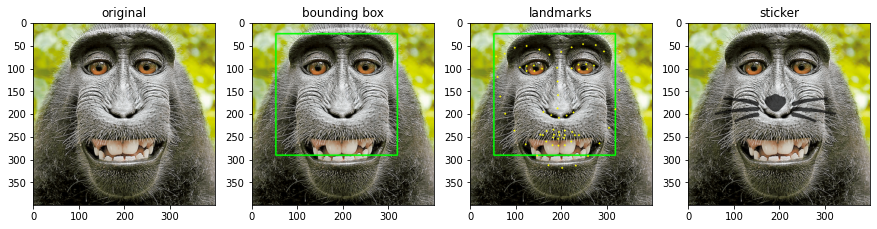

In [ ]:
new_sticker_image('img_ex_07.png')

**인식 가능**  
랜드마크 인식은 가능하나, 이빨을 턱으로 착각해 인식했으므로 랜드마크 위치가 이상하게 잡힘  

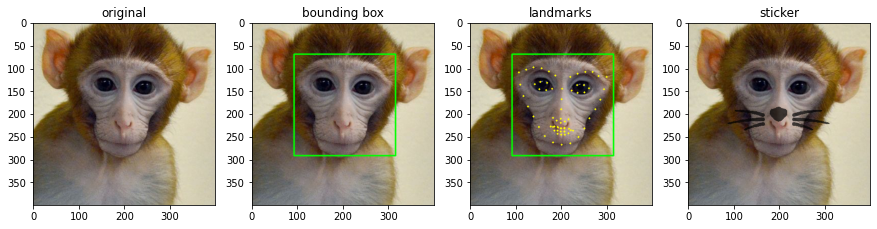

In [ ]:
new_sticker_image('img_ex_08.png')

**인식 가능**  
랜드마크 인식은 가능하나, 입술선을 턱으로 착각해 인식했으므로 랜드마크 위치가 이상하게 잡힘

### **🍃 02-2_이미지 방향이 다를 경우** 

- **정방향을 제외한 다른 방향은 모두 인식 불가**

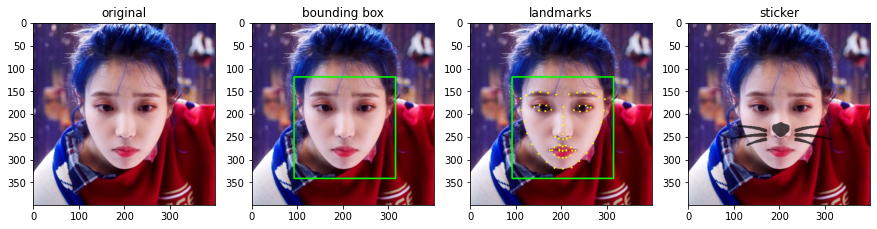

In [ ]:
new_sticker_image('img_ex_09.png')

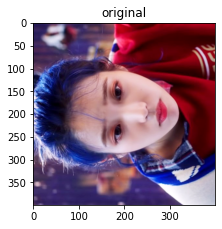

In [ ]:
new_sticker_image('img_ex_10.png')

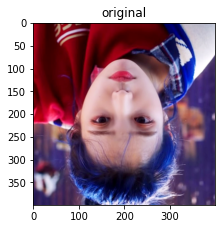

In [ ]:
new_sticker_image('img_ex_11.png')

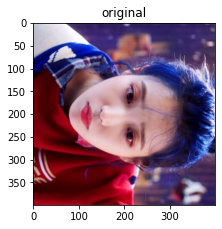

In [ ]:
new_sticker_image('img_ex_12.png')

### **🍃 02-3_이미지 각도가 다를 경우** 

- **약간의 고개 각도가 다른 경우는 인식 가능하지만, 스티커의 각도까지 변화하지는 않아 어색함**  
- **일정 각도 이상으로 넘어가면 더 이상 인식 불가**

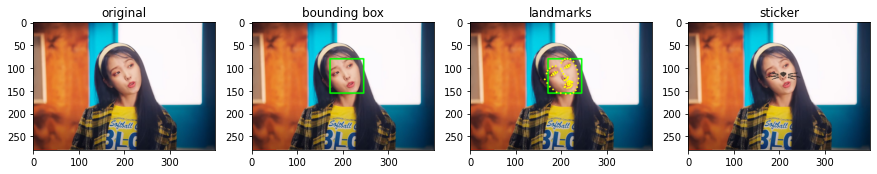

In [ ]:
new_sticker_image('img_ex_13.png')

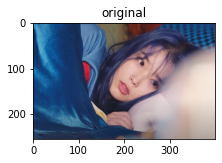

In [ ]:
new_sticker_image('img_ex_14.png')

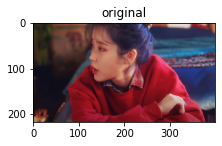

In [ ]:
new_sticker_image('img_ex_15.png')

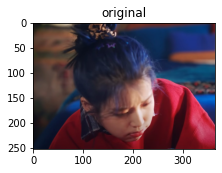

In [ ]:
new_sticker_image('img_ex_16.png')

### **🍃 02-4_이미지 거리가 다를 경우** 

- **일정 거리를 벗어나면 더 이상 인식 불가**  

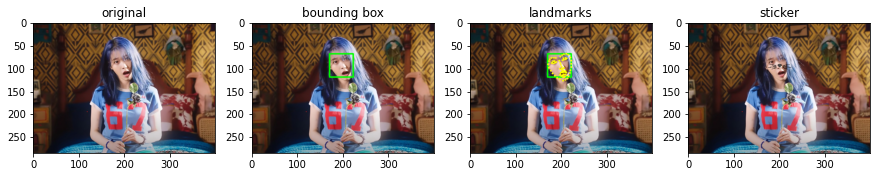

In [ ]:
new_sticker_image('img_ex_17.png')

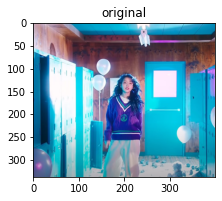

In [ ]:
new_sticker_image('img_ex_18.png')

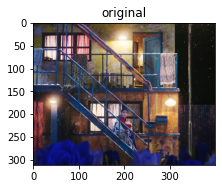

In [ ]:
new_sticker_image('img_ex_19.png')

### **🍃 02-5_이미지 명암이 다를 경우** 

- **이목구비를 심하게 인식하지 못하지 않는 정도의 명암 차이를 제외하고는 인식 가능**  

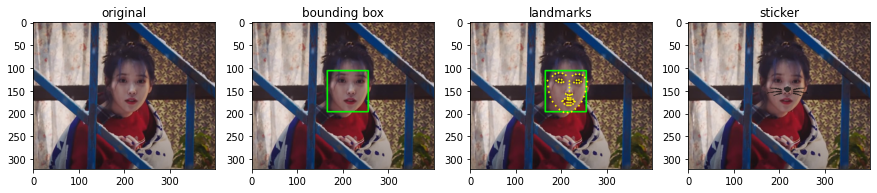

In [ ]:
new_sticker_image('img_ex_20.png')

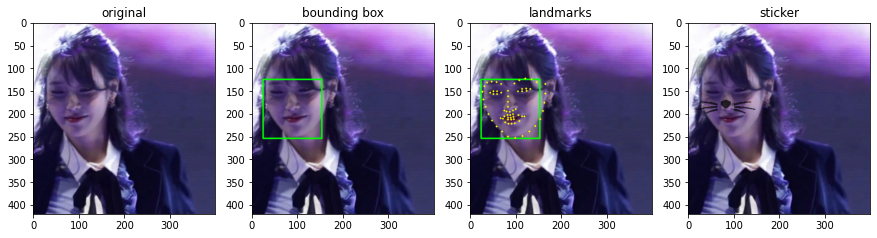

In [ ]:
new_sticker_image('img_ex_21.png')

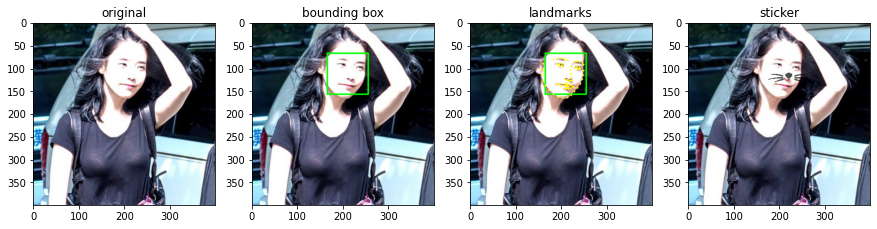

In [ ]:
new_sticker_image('img_ex_22.png')

### **🍃 02-6_이미지에 포함된 사람 수가 다른 경우** 

- **이미지에 포함된 사람 중 랜드마크 검출이 가능한 모든 사람 인식 가능**

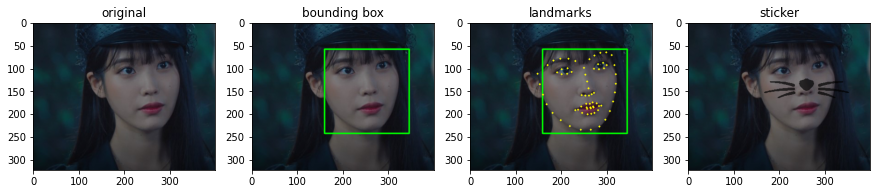

In [ ]:
new_sticker_image('img_ex_23.png')

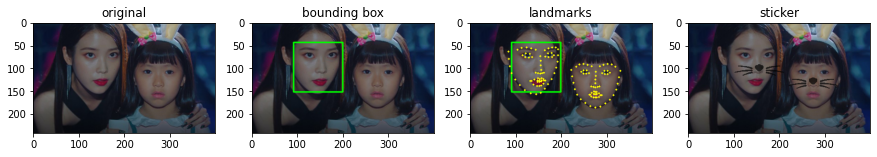

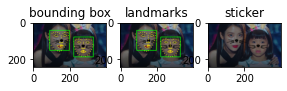

In [ ]:
new_sticker_image('img_ex_24.png')

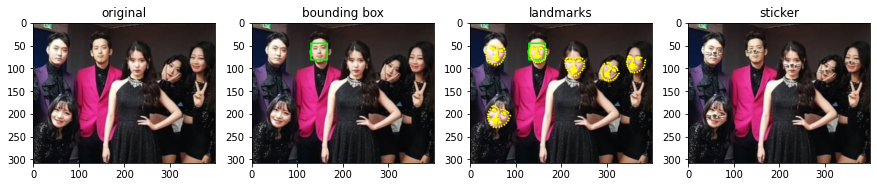

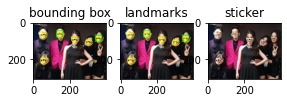

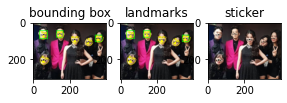

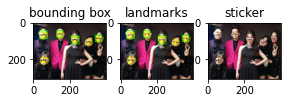

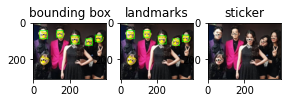

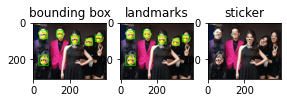

In [ ]:
new_sticker_image('img_ex_25.png')

<hr>

# **🌲 EXPLORATION 08-4 : 결론**

다양한 사진으로 비교를 해본 결과, 명암이 잘 구분되는 이미지에 포함된 인물의 사이즈가 크고, 정방향으로 눈썹 라인과 턱 라인이 일치하는 경우 대부분 인식이 가능하다는 결론이 도출되었다. 하지만 방향이 조금 다르거나 랜드마크가 이상한 위치에서 검출된 경우 스티커는 지정된 그대로 붙기 때문에 어색한 모습을 보여준다. 이 부분이 보완이 필요할 것 같다.

<hr>